<a href="https://colab.research.google.com/github/anacamilly/AlgoritmosEmPython/blob/main/washing__machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Criando os universos (domínios) para entradas e saídas
peso = ctrl.Antecedent(np.arange(0, 101, 1), 'peso') #0 a 100
sujeira = ctrl.Antecedent(np.arange(0, 101, 1), 'sujeira') #0 a 100
detergente = ctrl.Consequent(np.arange(0, 101, 1), 'detergente') #0 a 100

In [5]:
# Criando funções de pertinência
peso['muito-leve'] = fuzz.trimf(peso.universe, [0, 0, 20])
peso['leve'] = fuzz.trimf(peso.universe, [10,30,50])
peso['pesado'] = fuzz.trimf(peso.universe, [40,65,90])
peso['muito-pesado'] = fuzz.trapmf(peso.universe, [75,90,100,100])

sujeira['quase-limpo'] = fuzz.trimf(sujeira.universe, [0,0,20])
sujeira['sujo'] = fuzz.trimf(sujeira.universe, [10,30,50])
sujeira['muito-sujo'] = fuzz.trimf(sujeira.universe, [40,70,100])
sujeira['extra-sujo'] = fuzz.trimf(sujeira.universe, [80,100, 100])

detergente['muito-pouco'] = fuzz.trimf(detergente.universe, [0,10,20])
detergente['pouco'] = fuzz.trimf(detergente.universe, [20,30,40])
detergente['moderado'] = fuzz.trimf(detergente.universe, [40,50,60])
detergente['exagerado'] = fuzz.trimf(detergente.universe, [60,70,80])
detergente['maximo'] = fuzz.trapmf(detergente.universe, [80,90,100,100])

In [7]:
# Criando regras
rule_1 = ctrl.Rule(peso['muito-leve'] & sujeira['quase-limpo'], detergente['muito-pouco'])
rule_2 = ctrl.Rule(peso['leve'] & sujeira['quase-limpo'], detergente['pouco'])
rule_3 = ctrl.Rule(peso['pesado'] & sujeira['quase-limpo'], detergente['moderado'])
rule_4 = ctrl.Rule(peso['muito-pesado'] & sujeira['quase-limpo'], detergente['moderado'])

rule_5 = ctrl.Rule(peso['muito-leve'] & sujeira['sujo'], detergente['pouco'])
rule_6 = ctrl.Rule(peso['leve'] & sujeira['sujo'], detergente['pouco'])
rule_7 = ctrl.Rule(peso['pesado'] & sujeira['sujo'], detergente['moderado'])
rule_8 = ctrl.Rule(peso['muito-pesado'] & sujeira['sujo'], detergente['exagerado'])

rule_9 = ctrl.Rule(peso['muito-leve'] & sujeira['muito-sujo'], detergente['moderado'])
rule_10 = ctrl.Rule(peso['leve'] & sujeira['muito-sujo'], detergente['moderado'])
rule_11 = ctrl.Rule(peso['pesado'] & sujeira['muito-sujo'], detergente['exagerado'])
rule_12 = ctrl.Rule(peso['muito-pesado'] & sujeira['muito-sujo'], detergente['maximo'])

rule_13 = ctrl.Rule(peso['muito-leve'] & sujeira['extra-sujo'], detergente['moderado'])
rule_14 = ctrl.Rule(peso['leve'] & sujeira['extra-sujo'], detergente['exagerado'])
rule_15 = ctrl.Rule(peso['pesado'] & sujeira['extra-sujo'], detergente['exagerado'])
rule_16 = ctrl.Rule(peso['muito-pesado'] & sujeira['extra-sujo'], detergente['maximo'])

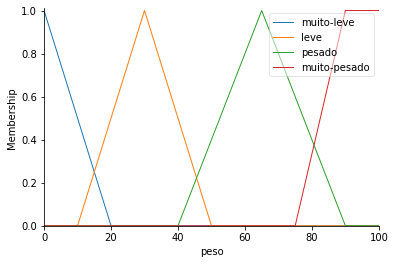

In [43]:
peso.view()

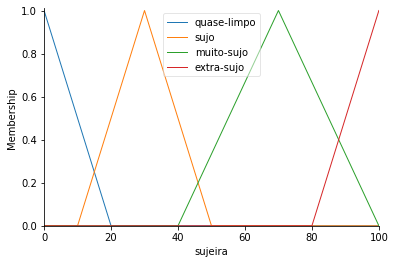

In [44]:
sujeira.view()

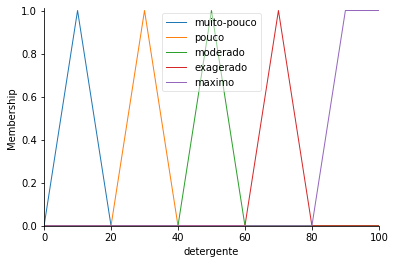

In [45]:
detergente.view()

In [8]:
# Criando um controlador fuzzy genérico com as regras mapeadas pelo especialista
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10, rule_11, rule_12, rule_13, rule_14, rule_15, rule_16])

# Estabelece um modelo de simulação para processar as entradas numéricas fornecidas pelo usuário no controlador acima
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [38]:
# Define entradas da UX com o usuário:
tipping.input['peso'] = 10
tipping.input['sujeira'] = 15

In [39]:
# Calcula a saída numérica já defuzzificada com o centroide
tipping.compute()

In [40]:
# Exibe resultados
print(tipping.output['detergente'])

19.999999999999996


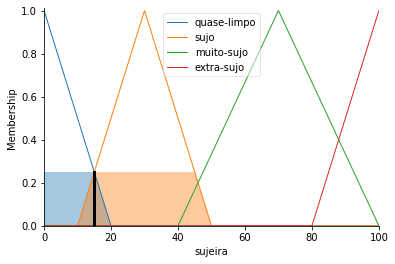

In [41]:
sujeira.view(sim=tipping)